[0 1 2 3 4 5 6 7 8 9]
2.3


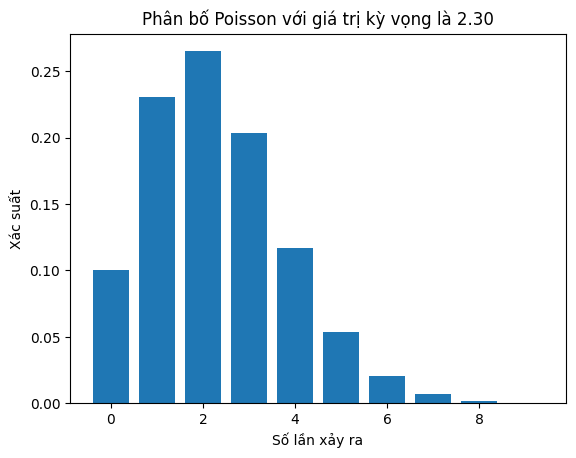

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Tạo dataframe với số lần xảy ra sự kiện
data = {'occurrence': [2, 3, 1, 4, 5, 2, 1, 0, 3, 2]}
df = pd.DataFrame(data)

# Tính giá trị kỳ vọng của phân phối Poisson từ dữ liệu
mu = df['occurrence'].mean()

# Tính xác suất của các giá trị số lần xảy ra khác nhau từ phân phối Poisson
k_values = np.arange(0, 10)
print(k_values)
print(mu)
poisson_probs = poisson.pmf(k_values, mu)

# Vẽ biểu đồ phân bố của phân phối Poisson
plt.bar(k_values, poisson_probs)
plt.xlabel('Số lần xảy ra')
plt.ylabel('Xác suất')
plt.title('Phân bố Poisson với giá trị kỳ vọng là {:.2f}'.format(mu))
plt.show()

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
# Tạo một mẫu dữ liệu gồm 1000 điểm
data = np.random.normal(size=20)

kde = gaussian_kde(data)
print(data)
print(kde)
# Tính toán mật độ xác suất tại các giá trị liên tục
# x = np.linspace(-4, 4, 50)
# y = kde.pdf(x)
# Trực quan hóa kết quả
# plt.plot(x, y)
# plt.show()

[-0.8754743  -0.0847451  -0.28831843  0.83164424 -0.85353548 -0.34698989
 -0.64194039 -1.09438471  2.53006626 -0.78971727 -0.40098389 -0.27469967
  2.18780787  0.18638163  0.5677872  -0.31969236 -0.2029573   1.50271963
  0.58776238 -0.55571587]


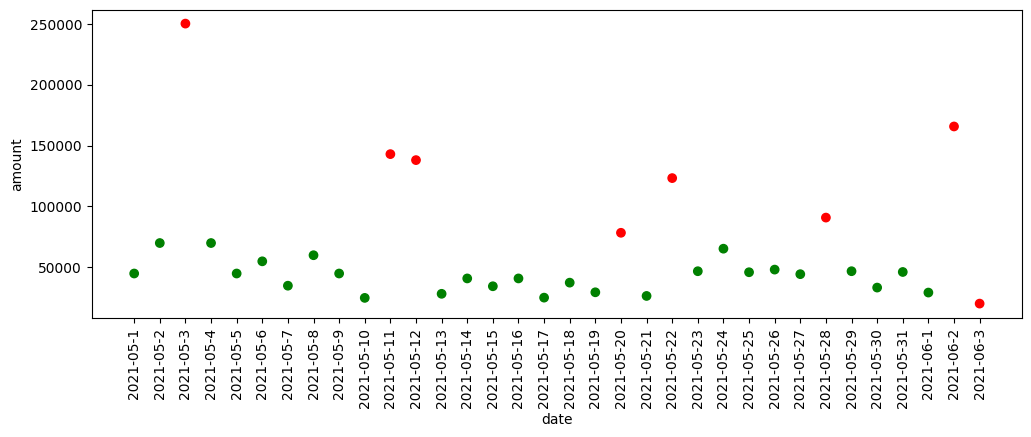

In [6]:
import warnings
import numpy as np
import pandas as pd
from pyod.models.mad import MAD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# data for anomaly detection
data_values = [['2021-05-1', 45000.0],
       ['2021-05-2', 70000.0],
       ['2021-05-3', 250000.0],
       ['2021-05-4', 70000.0],
       ['2021-05-5', 45000.0],
       ['2021-05-6', 55000.0],
       ['2021-05-7', 35000.0],
       ['2021-05-8', 60000.0],
       ['2021-05-9', 45000.0],
       ['2021-05-10', 25000.0],
       ['2021-05-11', 142936.0],
       ['2021-05-12', 138026.0],
       ['2021-05-13', 28347.0],
       ['2021-05-14', 40962.66],
       ['2021-05-15', 34543.0],
       ['2021-05-16', 40962.66],
       ['2021-05-17', 25207.0],
       ['2021-05-18', 37502.0],
       ['2021-05-19', 29589.0],
       ['2021-05-20', 78404.0],
       ['2021-05-21', 26593.0],
       ['2021-05-22', 123267.0],
       ['2021-05-23', 46880.0],
       ['2021-05-24', 65361.0],
       ['2021-05-25', 46042.0],
       ['2021-05-26', 48209.0],
       ['2021-05-27', 44461.0],
       ['2021-05-28', 90866.0],
       ['2021-05-29', 46886.0],
       ['2021-05-30', 33456.0],
       ['2021-05-31', 46251.0],
       ['2021-06-1', 29370.0],
       ['2021-06-2', 165620.0],
       ['2021-06-3', 20317.0]]
       
data = pd.DataFrame(data_values , columns=['date', 'amount'])

def fit_model(model, data, column='amount'):
    # fit the model and predict it
    df = data.copy()
    data_to_predict = data[column].to_numpy().reshape(-1, 1)
    predictions = model.fit_predict(data_to_predict)
    df['Predictions'] = predictions
    
    return df

def plot_anomalies(df, x='date', y='amount'):

    # categories will be having values from 0 to n
    # for each values in 0 to n it is mapped in colormap
    categories = df['Predictions'].to_numpy()
    colormap = np.array(['g', 'r'])

    f = plt.figure(figsize=(12, 4))
    f = plt.scatter(df[x], df[y], c=colormap[categories])
    f = plt.xlabel(x)
    f = plt.ylabel(y)
    f = plt.xticks(rotation=90)
    plt.show()



def find_anomalies(value, lower_threshold, upper_threshold):
    
    if value < lower_threshold or value > upper_threshold:
        return 1
    else: return 0

def iqr_anomaly_detector(data, column='amount', threshold=1.1):
    
    df = data.copy()
    quartiles = dict(data[column].quantile([.25, .50, .75]))
    quartile_3, quartile_1 = quartiles[0.75], quartiles[0.25]
    iqr = quartile_3 - quartile_1

    lower_threshold = quartile_1 - (threshold * iqr)
    upper_threshold = quartile_3 + (threshold * iqr)

    print(f"Lower threshold: {lower_threshold}, \nUpper threshold: {upper_threshold}\n")
    
    df['Predictions'] = data[column].apply(find_anomalies, args=(lower_threshold, upper_threshold))
    return df

# print(data)
# iqr_df = iqr_anomaly_detector(data)
# plot_anomalies(iqr_df)

iso_forest = IsolationForest(n_estimators=125)
iso_df = fit_model(iso_forest, data)
iso_df['Predictions'] = iso_df['Predictions'].map(lambda x: 1 if x==-1 else 0)
plot_anomalies(iso_df)
# iso_forest = IsolationForest(n_estimators=125)
# iso_df = fit_model(iso_forest, data)
# iso_df['Predictions'] = iso_df['Predictions'].map(lambda x: 1 if x==-1 else 0)
# plot_anomalies(iso_df)

0.999999999829033


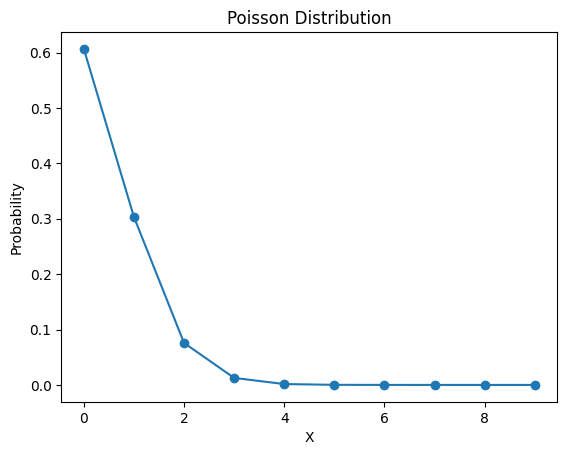

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Tham số phân phối Poisson
lambda_val = 0.5

# Tạo dải giá trị x
x_values = np.arange(0, 10)

# Tính giá trị xác suất tương ứng với mỗi giá trị x
poisson_probs = poisson.pmf(x_values, lambda_val)

print(poisson_probs.sum())

# Vẽ đường line Poisson
plt.plot(x_values, poisson_probs, '-o')

plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Poisson Distribution')
plt.show()

In [13]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from pyod.models.hbos import HBOS

# Tạo dữ liệu mẫu
X, _ = make_blobs(n_samples=1000, centers=1, random_state=42, cluster_std=0.5)
X = StandardScaler().fit_transform(X)

# Tạo và huấn luyện mô hình HBOS
model = HBOS()
model.fit(X)

# Dự đoán outlier scores cho dữ liệu
scores = model.decision_scores_

# In các outlier scores
print(scores)

[2.54810394 2.14265265 2.14265265 2.90636885 2.04407707 2.14265265
 3.96732902 3.16407894 2.21736415 2.04407707 3.30651292 2.43751735
 2.14265265 2.14265265 4.35281048 2.64667952 2.99079186 3.9678659
 2.76825714 2.64667952 2.04407707 2.26423027 2.04407707 2.26423027
 2.26423027 2.31593973 2.97577313 2.31593973 2.80779327 4.91177074
 2.04407707 2.04407707 2.14265265 2.90636885 2.97577313 2.31593973
 2.14265265 3.02794647 2.21736415 4.35281048 2.54810394 2.54810394
 2.80779327 3.56620226 3.61803345 2.04407707 4.63270656 2.31593973
 3.16407894 3.02794647 3.42907323 2.54810394 2.26423027 2.76825714
 2.26423027 2.90636885 2.26423027 2.14265265 2.26423027 3.16407894
 2.80779327 3.42907323 2.76825714 2.97577313 3.56620226 2.31593973
 2.54810394 2.54810394 2.54810394 2.64667952 2.99079186 2.90636885
 2.64667952 2.64667952 2.04407707 3.51945787 2.14265265 2.21736415
 2.14265265 2.31593973 2.21736415 2.21736415 2.76825714 2.21736415
 4.75393724 3.30651292 3.86929032 3.61803345 2.21736415 4.35281